In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Canceled,2015-06-29
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,242.0,NaN,0,Transient,117.00,0,1,Canceled,2015-05-13
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,0.0,0,HB,ESP,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,105.0,NaN,0,Transient,196.54,0,1,Check-Out,2015-07-10
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,1.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,99.30,1,2,Check-Out,2015-07-10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data['country'].replace(np.nan,'others', inplace = True)
data['agent'].replace(np.nan, 0, inplace = True)
data['company'].replace(np.nan, 0, inplace = True)
data['children'].replace(np.nan, 0, inplace = True)

In [8]:
data.duplicated().sum()

31994

In [9]:
data.drop_duplicates(inplace = True)

<Axes: xlabel='hotel', ylabel='count'>

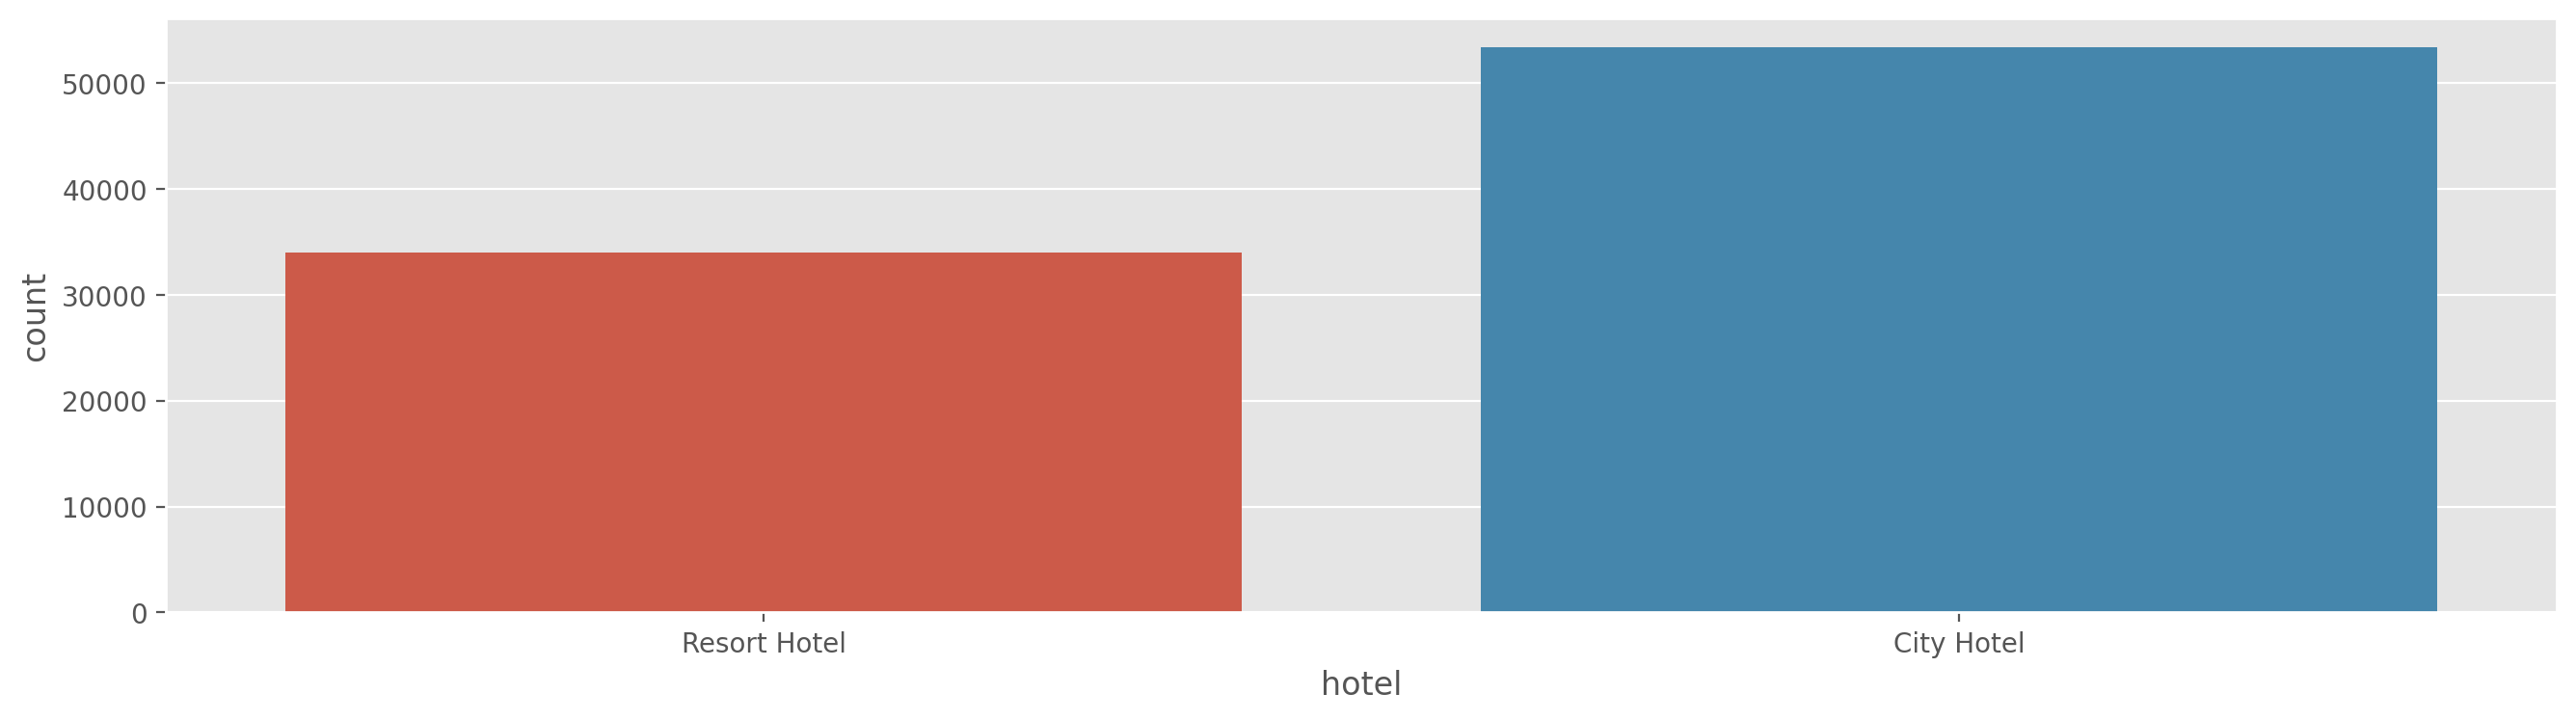

In [10]:
plt.figure(figsize = (16,4) ,dpi = 200)
sns.countplot(x = data['hotel'])

<Axes: xlabel='is_canceled', ylabel='count'>

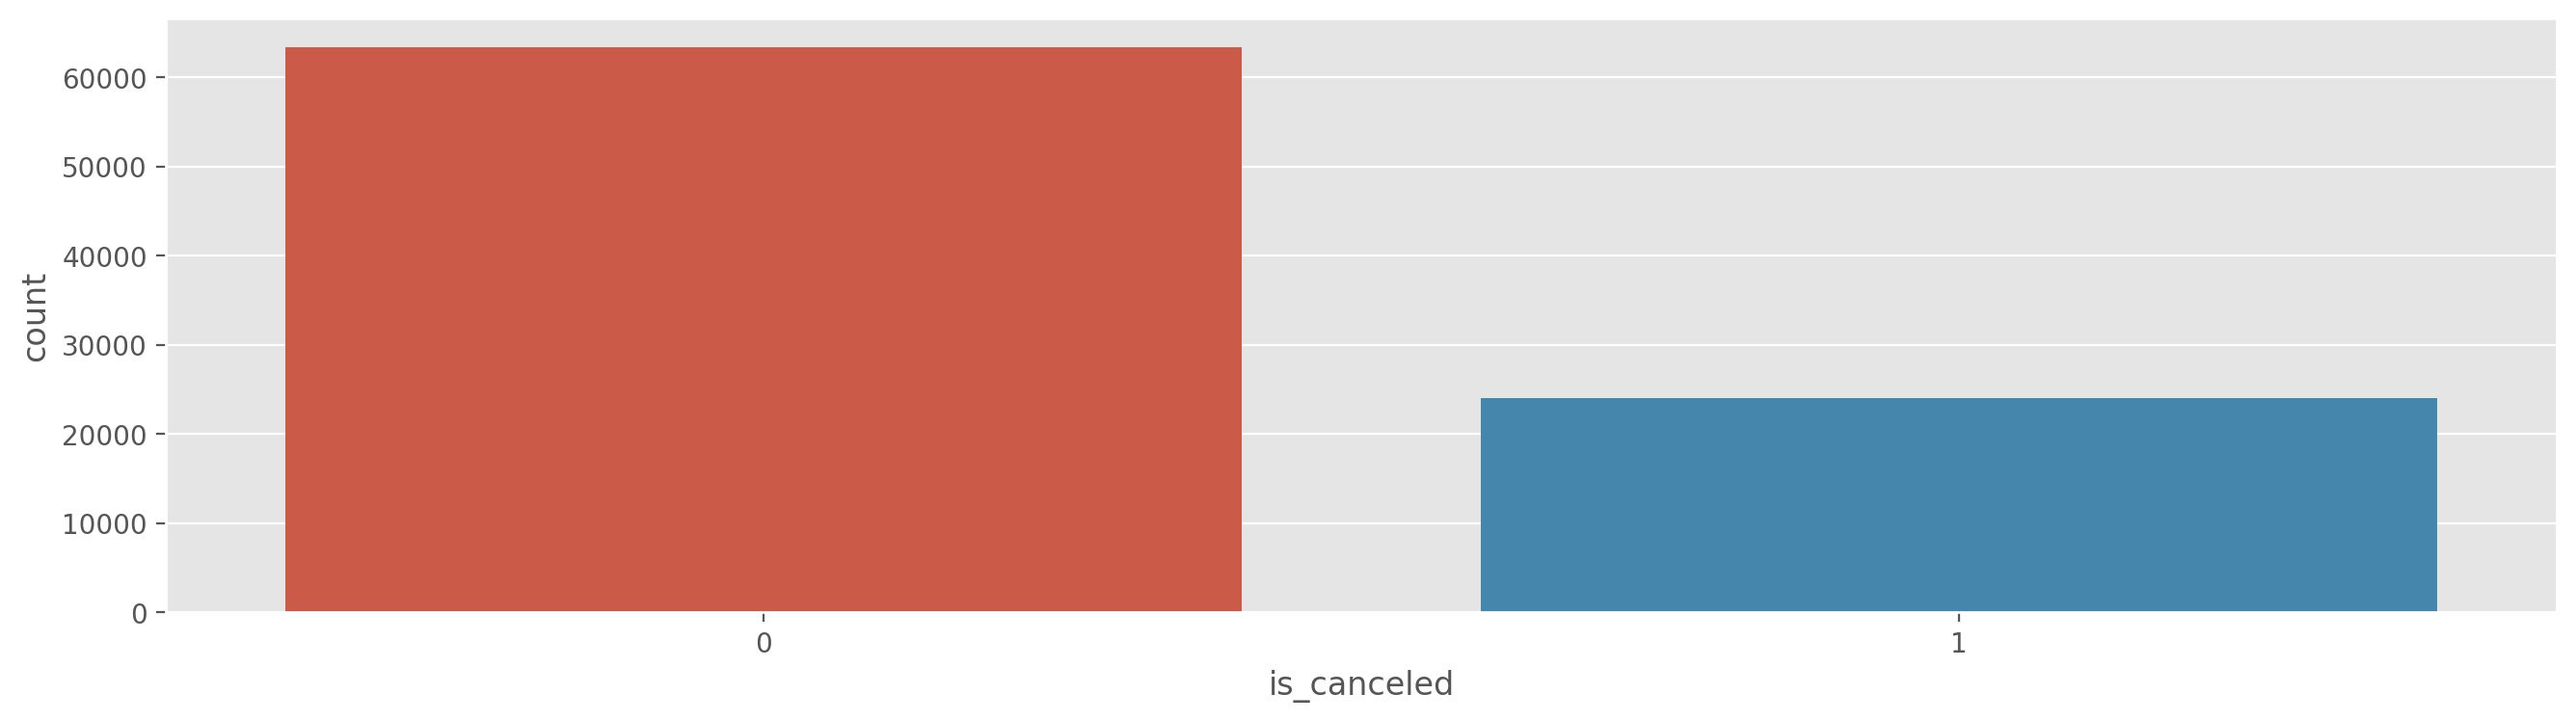

In [11]:
plt.figure(figsize = (16,4) ,dpi = 200)
sns.countplot(x = data['is_canceled'])

<Axes: xlabel='is_canceled', ylabel='count'>

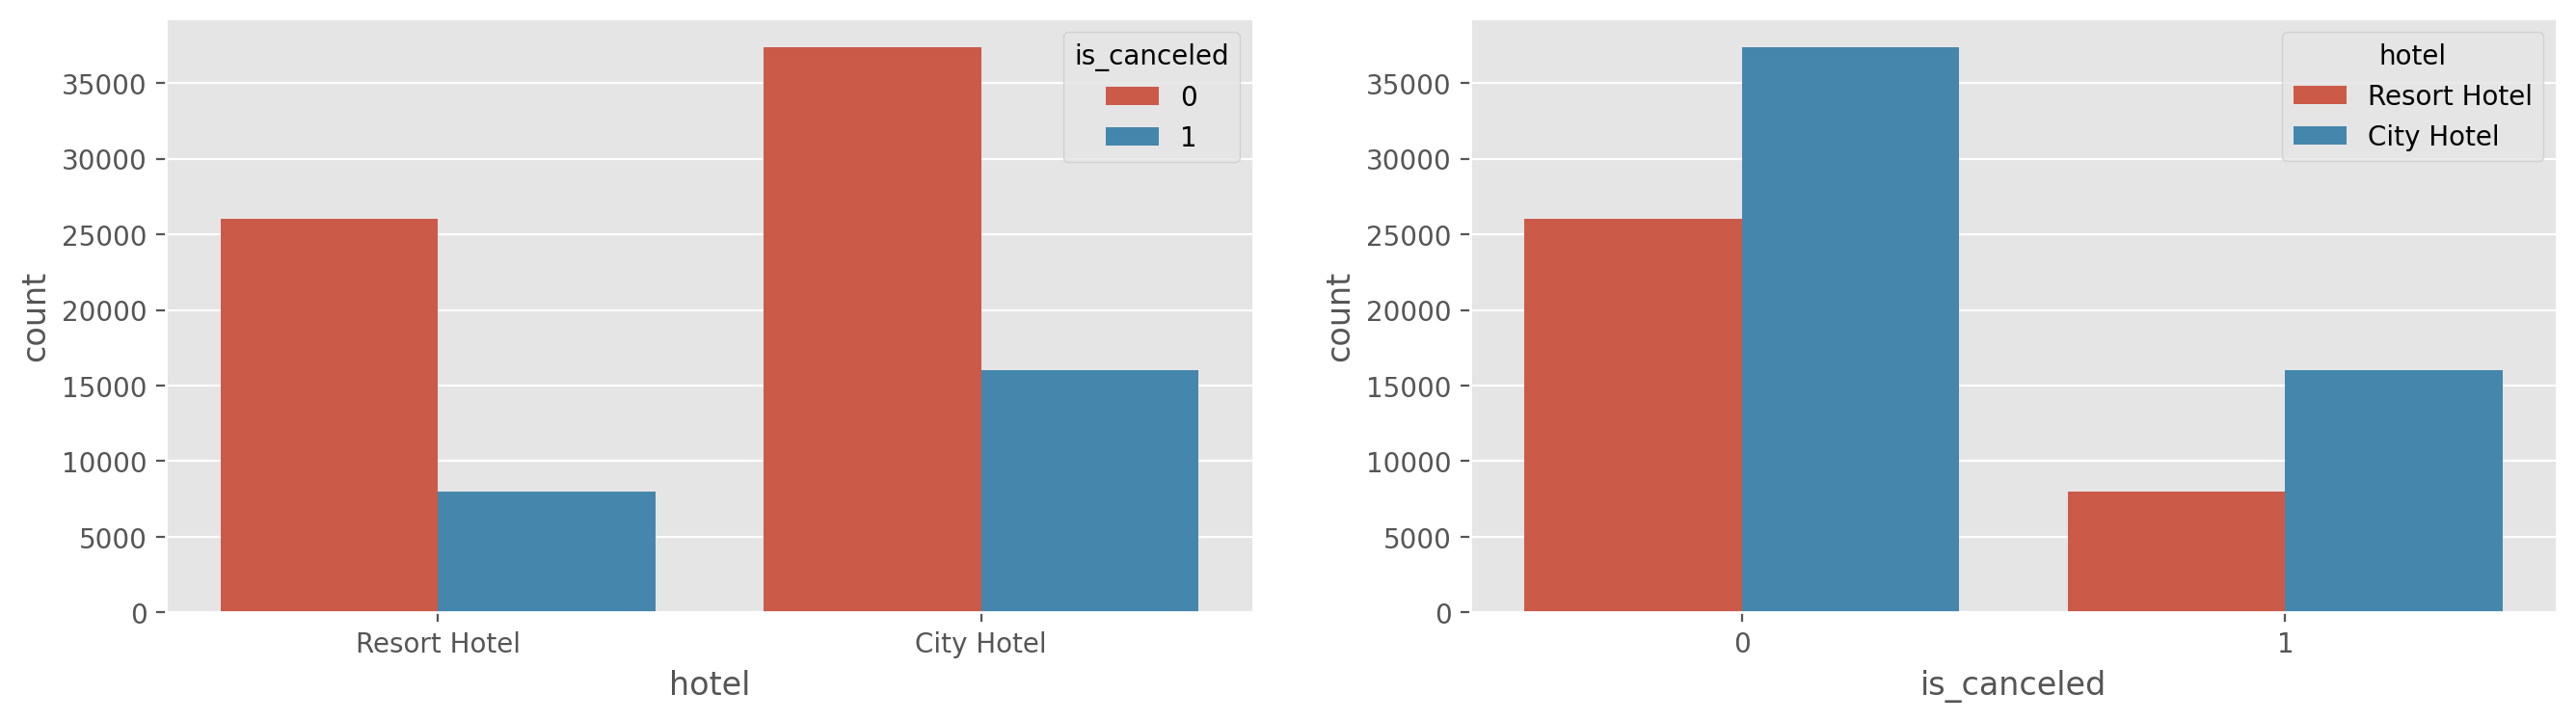

In [12]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['hotel'], hue = data['is_canceled'])
plt.subplot(1,2,2)
sns.countplot(x = data['is_canceled'], hue = data['hotel'])


<Axes: xlabel='count', ylabel='arrival_date_month'>

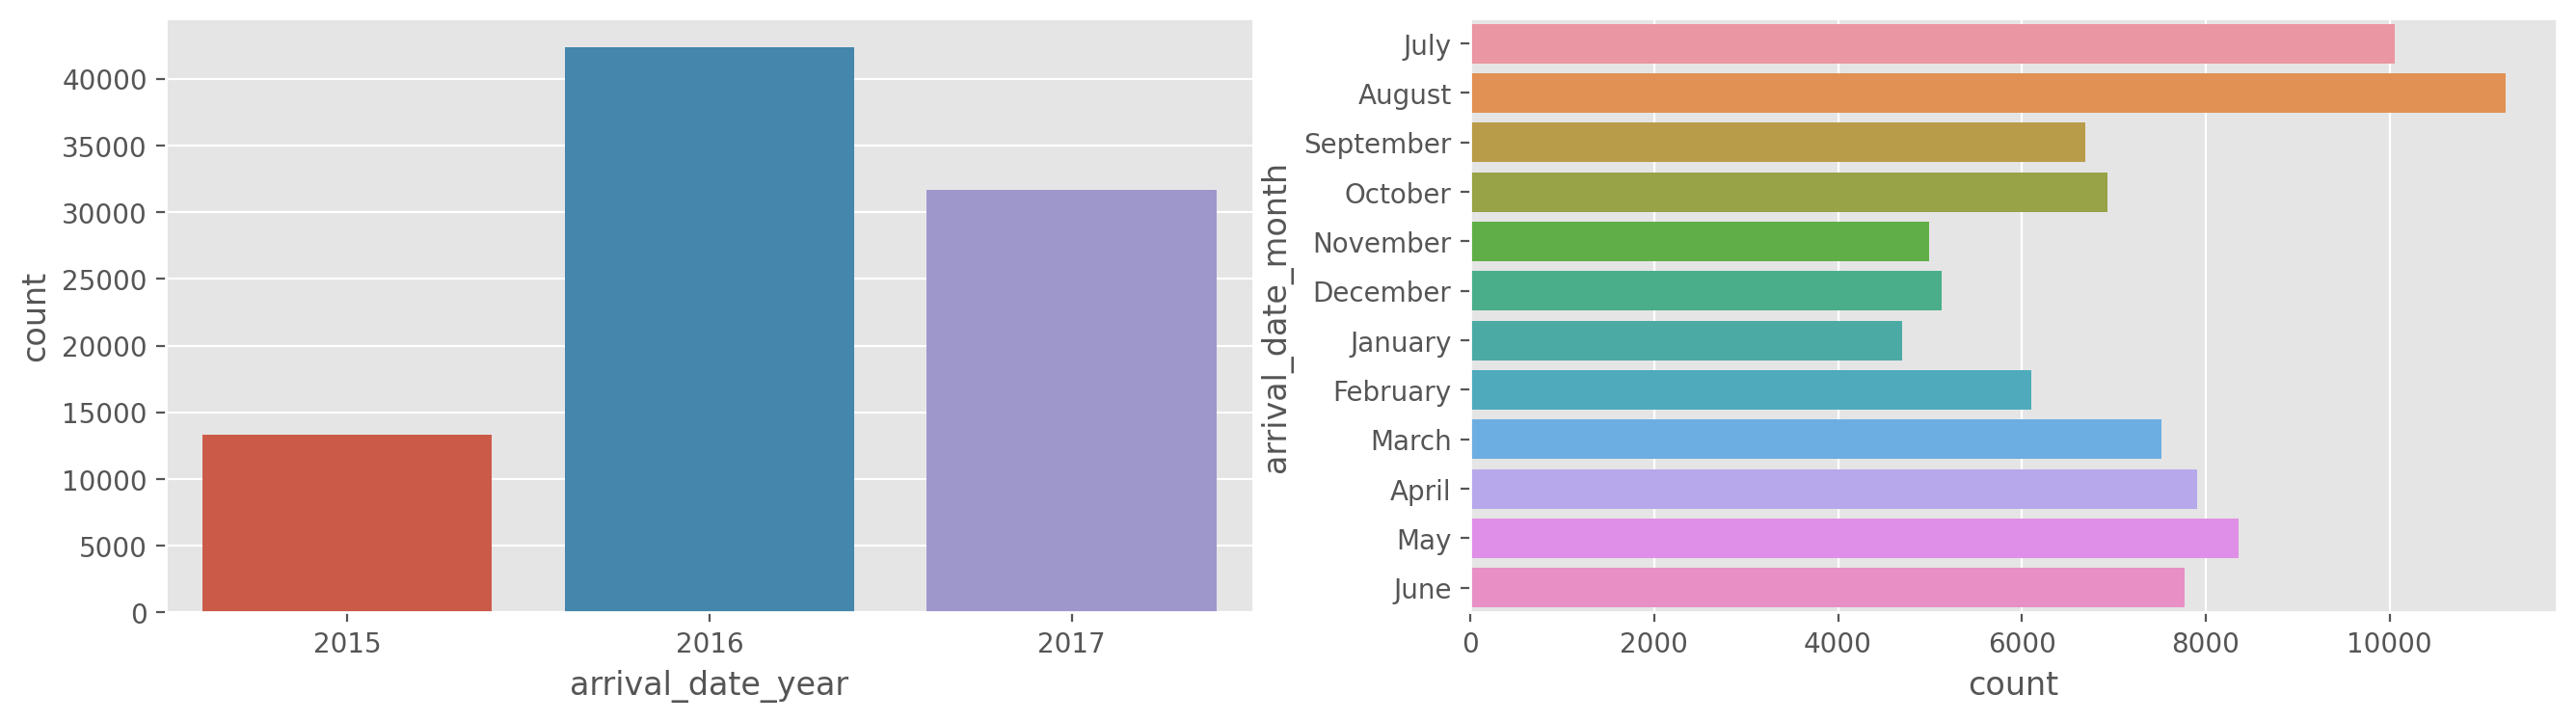

In [13]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['arrival_date_year'])
plt.subplot(1,2,2)
sns.countplot(y = data['arrival_date_month'])

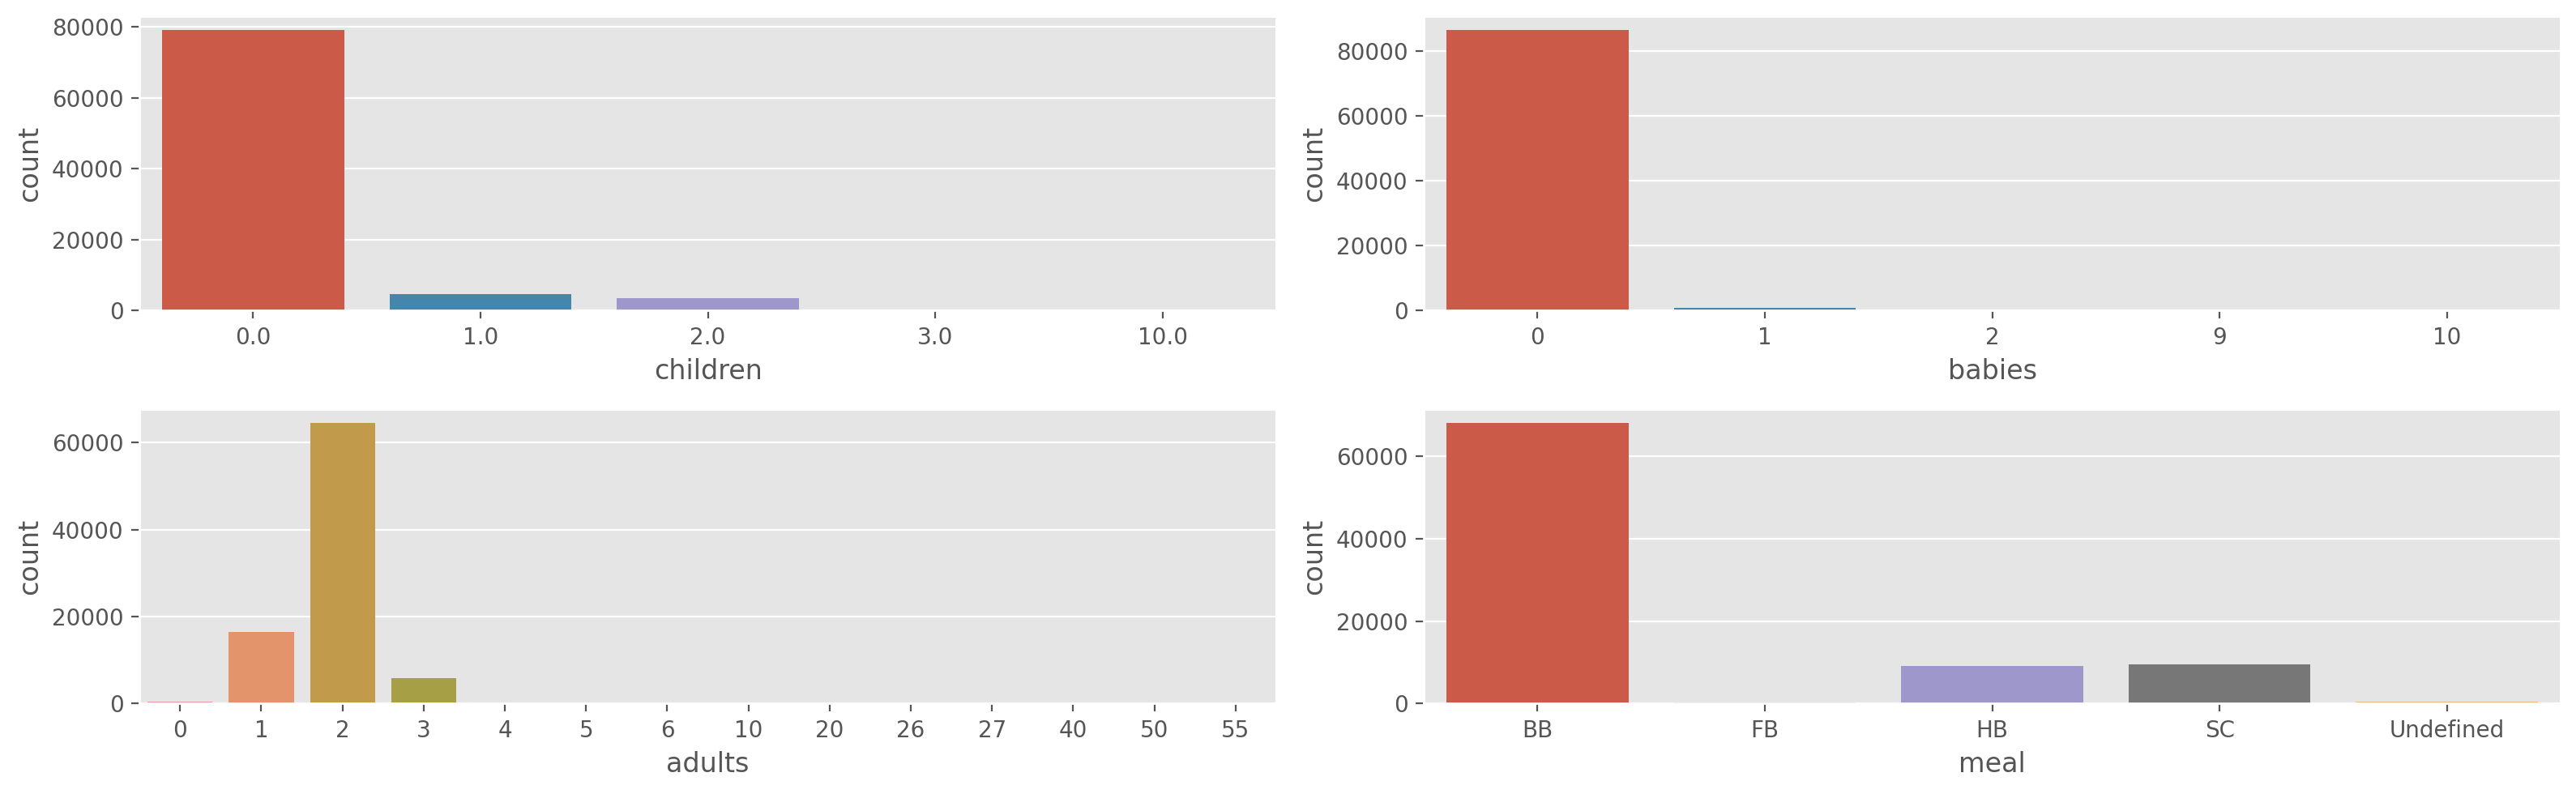

In [14]:
plt.figure(figsize = (16,5) ,dpi = 200)
plt.subplot(2,2,1)
sns.countplot(x = data['children'])
plt.subplot(2,2,2)
sns.countplot(x = data['babies'])
plt.subplot(2,2,3)
sns.countplot(x = data['adults'])
plt.subplot(2,2,4)
sns.countplot(x = data['meal'])
plt.tight_layout()

<Axes: xlabel='count', ylabel='country'>

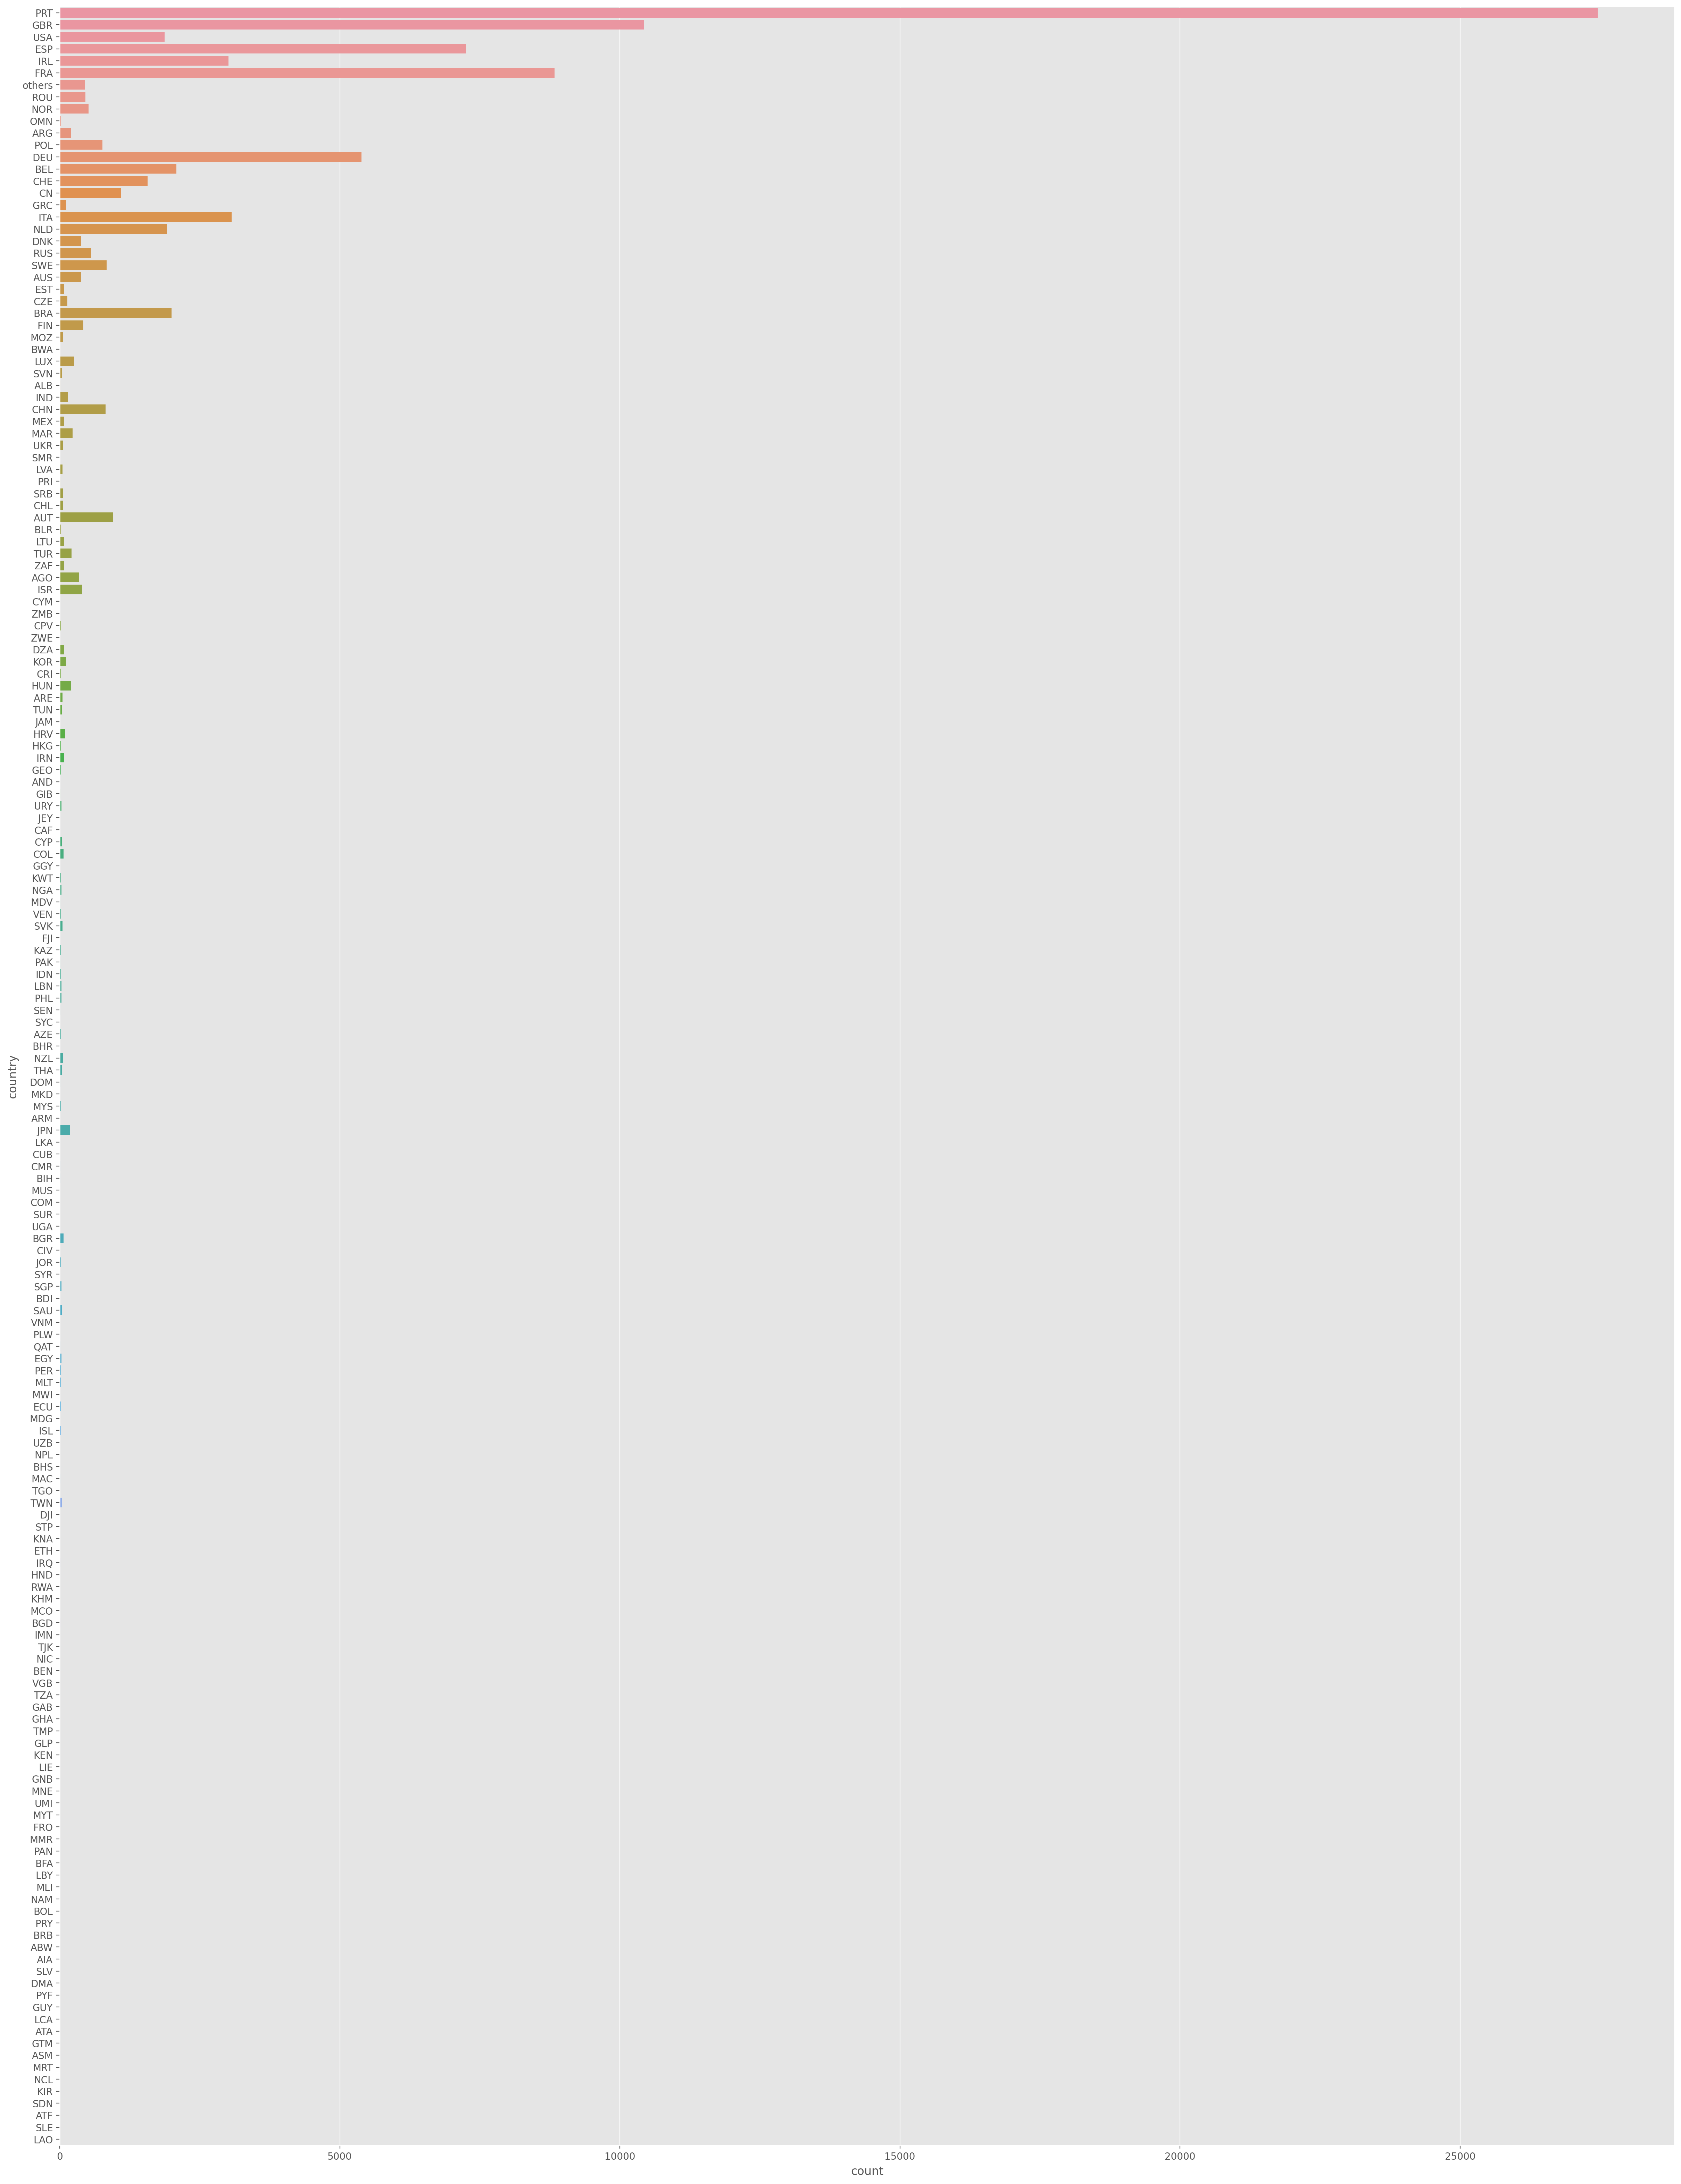

In [15]:
plt.figure(figsize = (30,40) ,dpi = 200)
sns.countplot(y = data['country'])

<Axes: xlabel='distribution_channel', ylabel='count'>

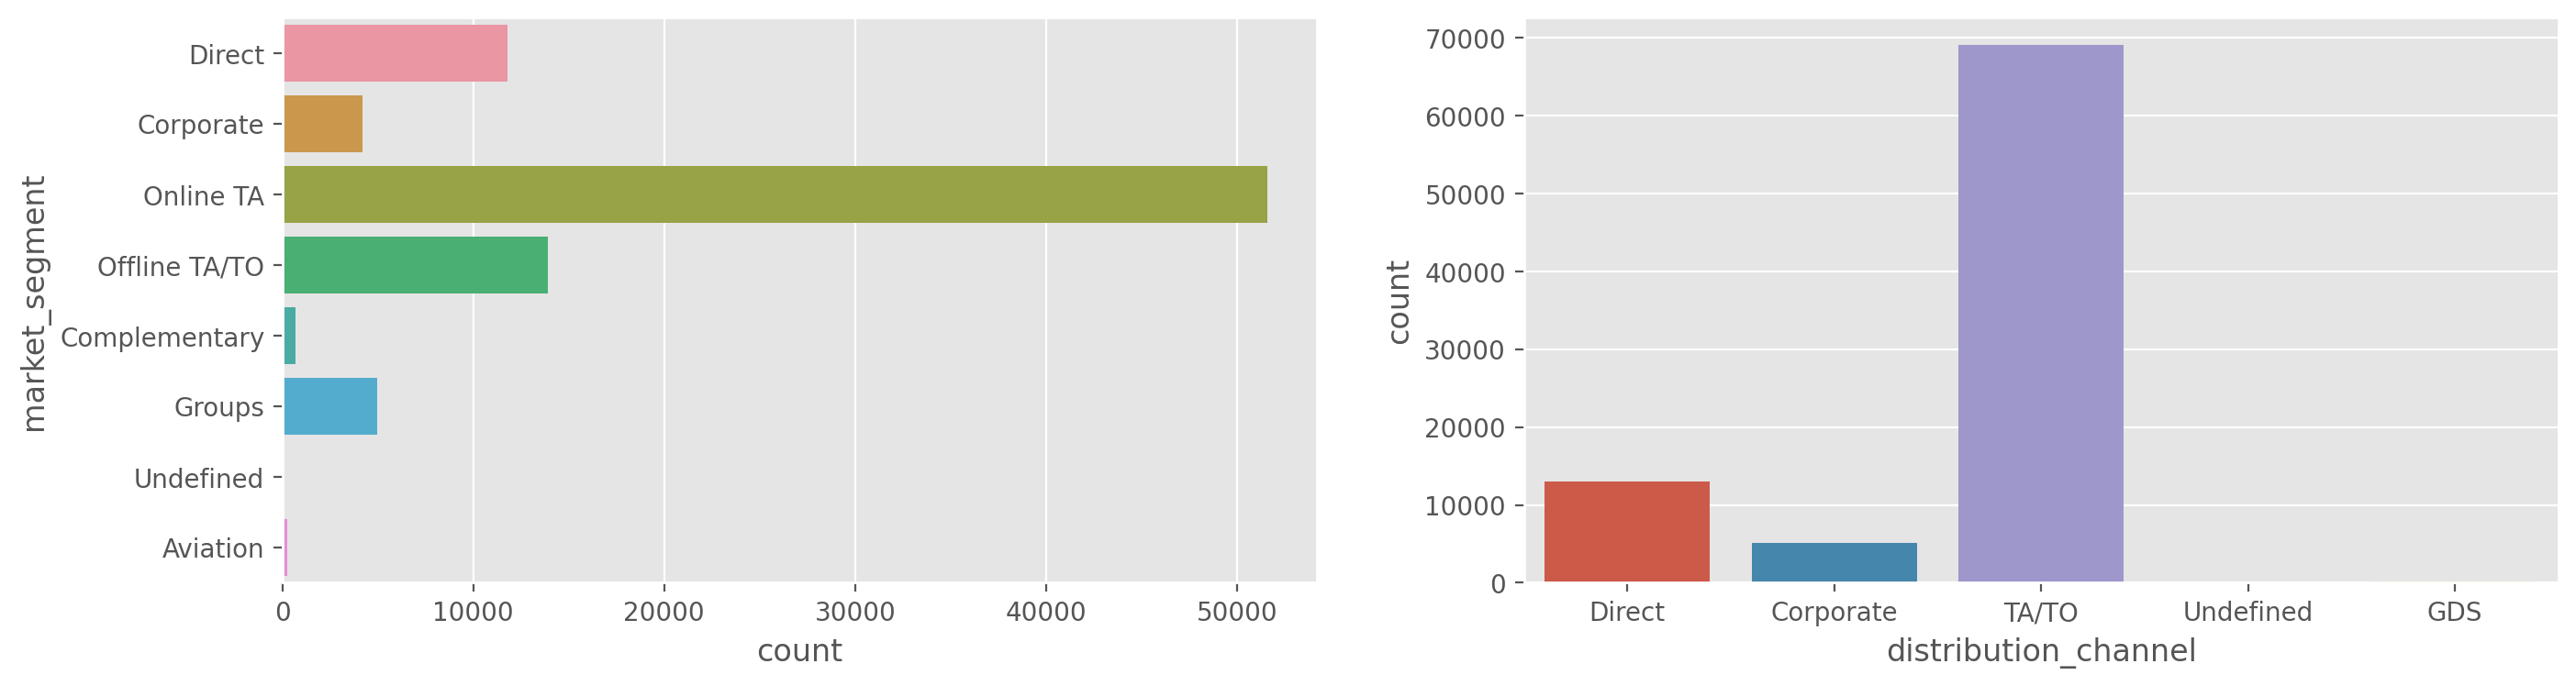

In [16]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(y = data['market_segment'])
plt.subplot(1,2,2)
sns.countplot(x = data['distribution_channel'])

<ipython-input-17-a42652aee06d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['previous_bookings_not_canceled'])


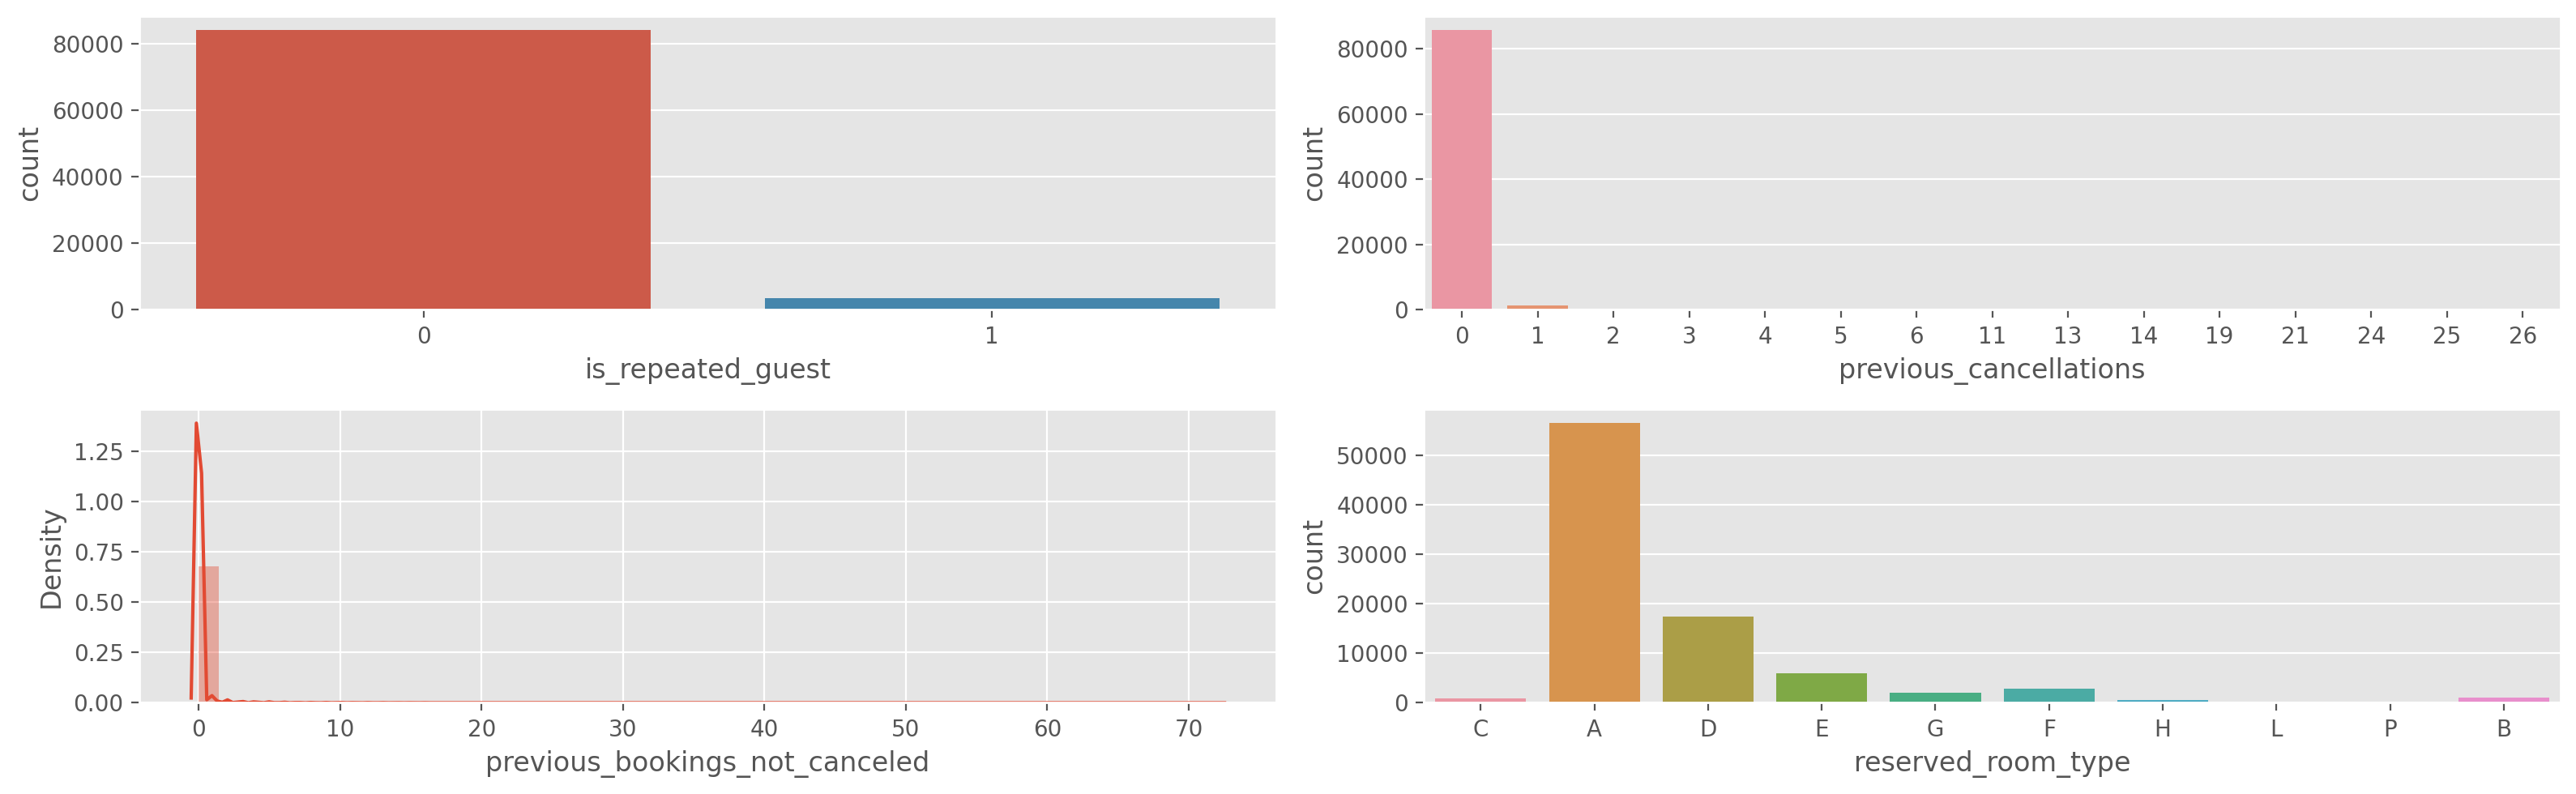

In [17]:
plt.figure(figsize = (16,5) ,dpi = 200)
plt.subplot(2,2,1)
sns.countplot(x = data['is_repeated_guest'])
plt.subplot(2,2,2)
sns.countplot(x = data['previous_cancellations'])
plt.subplot(2,2,3)
sns.distplot(data['previous_bookings_not_canceled'])
plt.subplot(2,2,4)
sns.countplot(x = data['reserved_room_type'])
plt.tight_layout()

In [18]:
data['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

<Axes: xlabel='booking_changes', ylabel='count'>

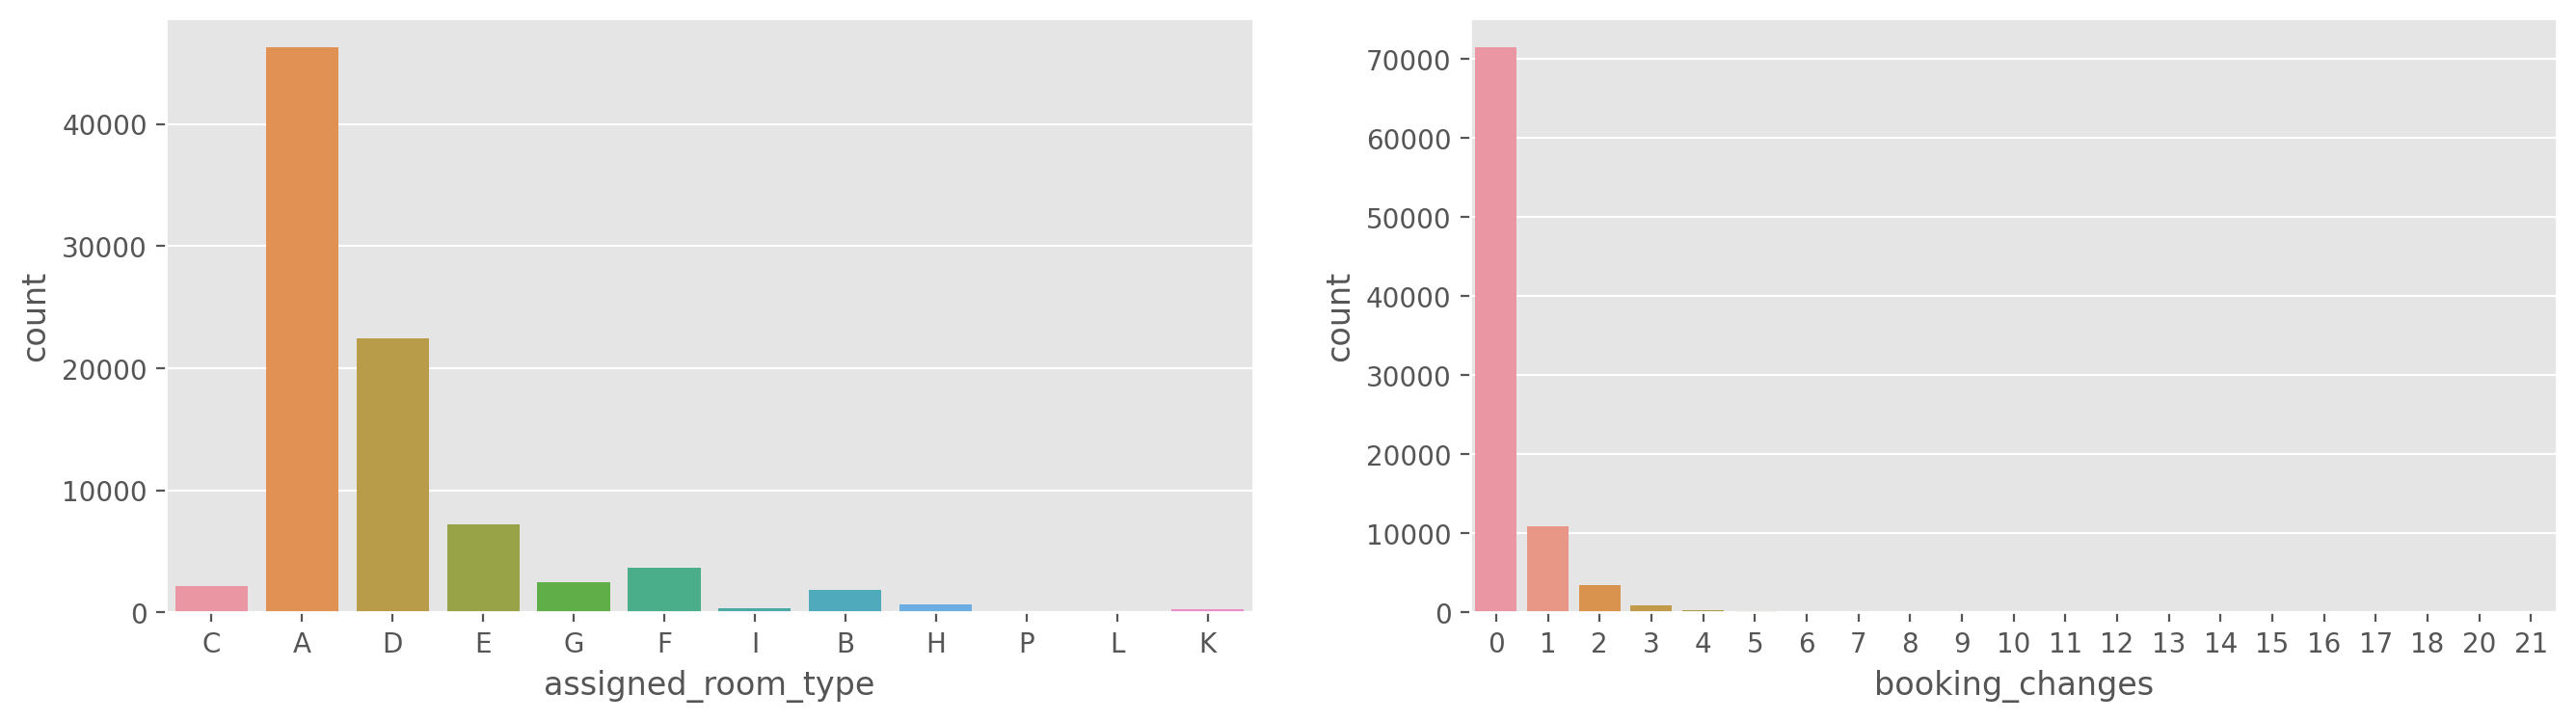

In [19]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['assigned_room_type'])
plt.subplot(1,2,2)
sns.countplot(x = data['booking_changes'])

<ipython-input-20-3d8f26c86c51>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['days_in_waiting_list'])


<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

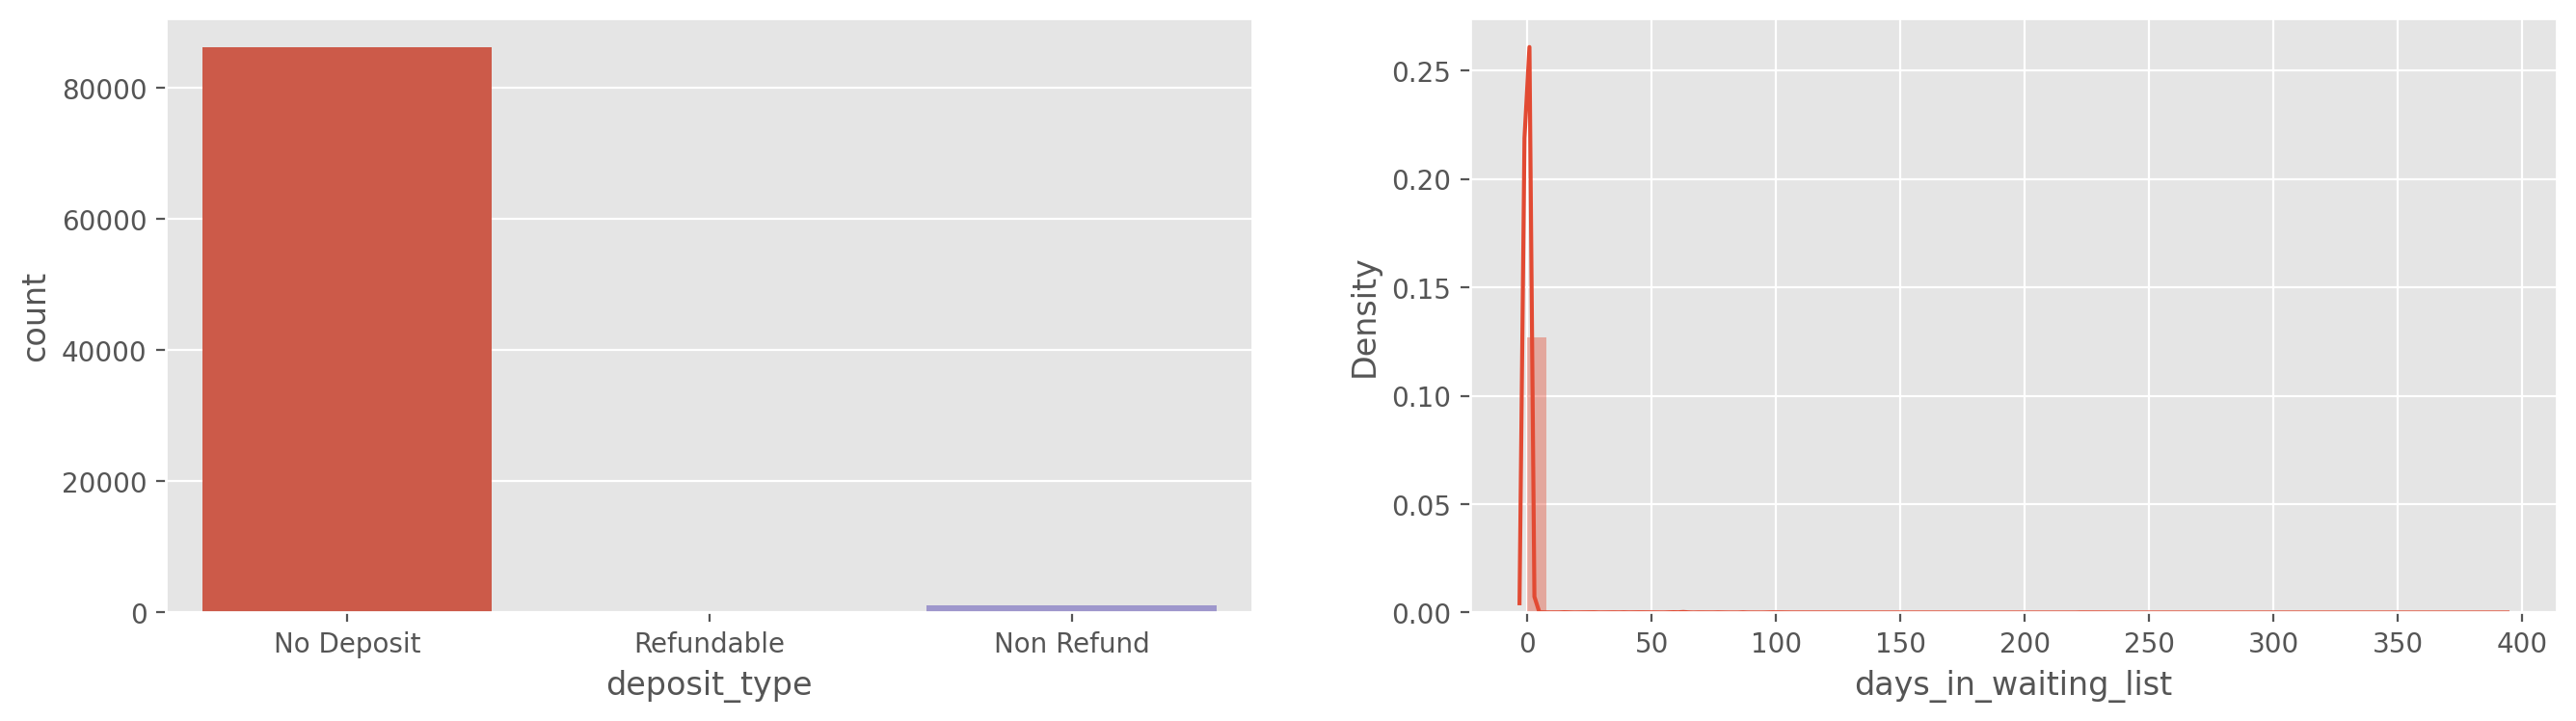

In [20]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['deposit_type'])
plt.subplot(1,2,2)
sns.distplot(data['days_in_waiting_list'])

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

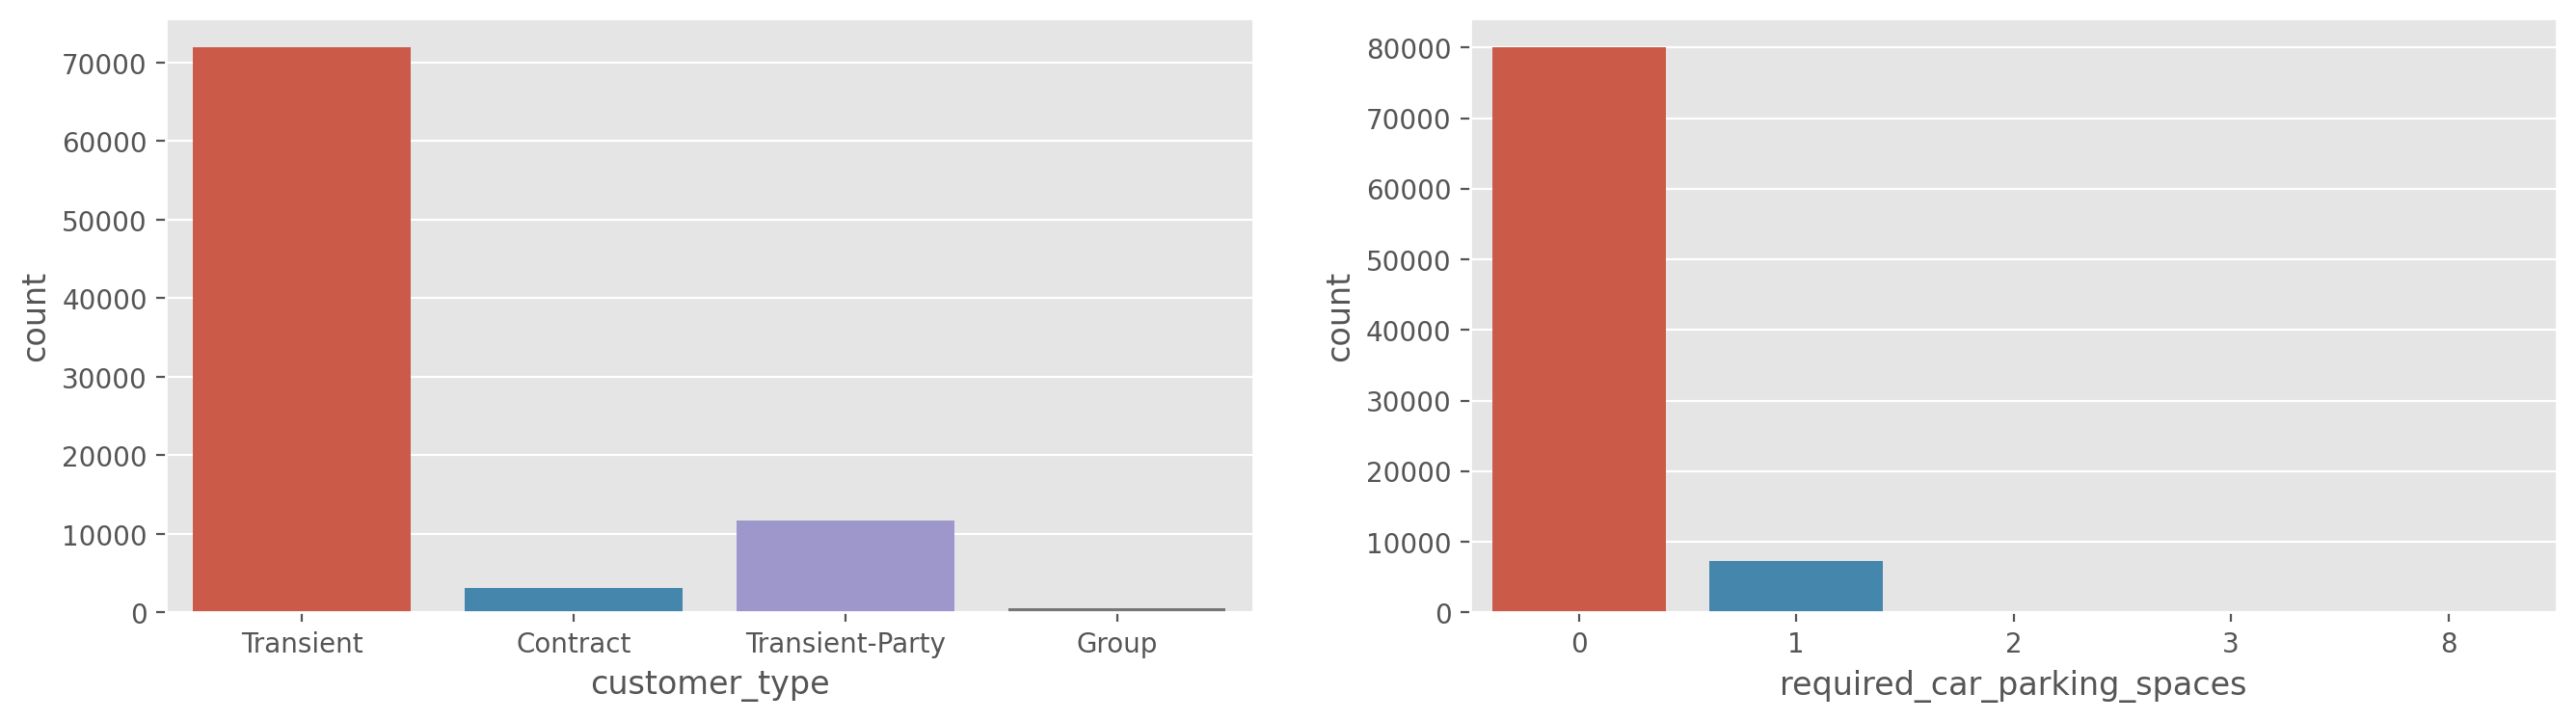

In [21]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['customer_type'])
plt.subplot(1,2,2)
sns.countplot(x = data['required_car_parking_spaces'])

<Axes: xlabel='reservation_status', ylabel='count'>

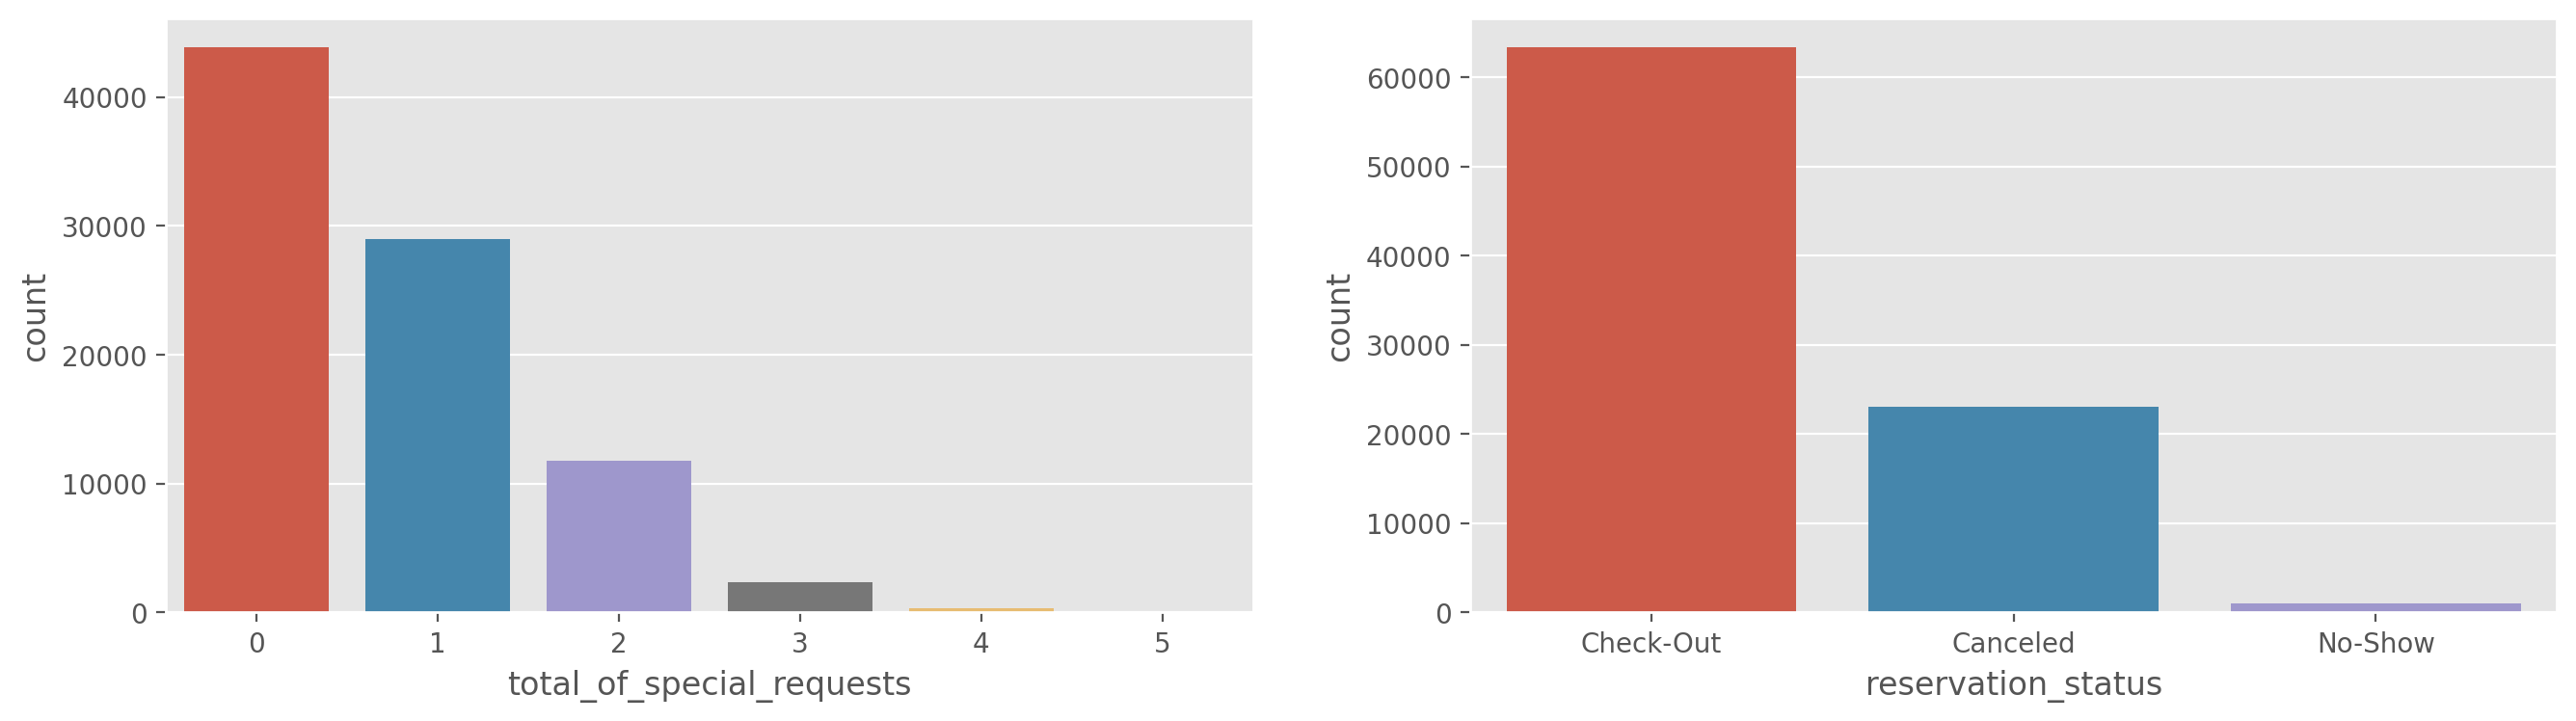

In [22]:
plt.figure(figsize = (16,4) ,dpi = 200)
plt.subplot(1,2,1)
sns.countplot(x = data['total_of_special_requests'])
plt.subplot(1,2,2)
sns.countplot(x = data['reservation_status'])

In [23]:
X = data.drop(['is_canceled','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date'],axis = 1)
Y = data[['is_canceled']]

print('Data Shape   : ', X.shape)
print('Labels Shape : ', Y.shape)

Data Shape   :  (87396, 27)
Labels Shape :  (87396, 1)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['lead_time','adr']] = scaler.fit_transform(X[['lead_time','adr']])

In [25]:
cols = ['hotel', 'arrival_date_month', 'adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel', 'previous_cancellations',
   'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list',
   'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[cols]= encoder.fit_transform(X[cols])

In [26]:
X

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1.0,0.464043,5.0,0,0,2.0,0.0,0.0,0.0,135.0,3.0,1.0,0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.001180,0.0,0.0,1.0
1,1.0,1.000000,5.0,0,0,2.0,0.0,0.0,0.0,135.0,3.0,1.0,0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,2.0,0.001180,0.0,0.0,1.0
2,1.0,0.009498,5.0,0,1,1.0,0.0,0.0,0.0,59.0,3.0,1.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.015053,0.0,0.0,1.0
3,1.0,0.017639,5.0,0,1,1.0,0.0,0.0,0.0,59.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,221.0,0.0,0.0,2.0,0.015053,0.0,0.0,1.0
4,1.0,0.018996,5.0,0,2,2.0,0.0,0.0,0.0,59.0,6.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,0.0,0.0,2.0,0.019307,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,0.031208,1.0,2,5,2.0,0.0,0.0,0.0,15.0,5.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,2.0,0.018963,0.0,0.0,1.0
119386,0.0,0.138399,1.0,2,5,3.0,0.0,0.0,0.0,56.0,6.0,3.0,0,0.0,0.0,4.0,4.0,0.0,0.0,9.0,0.0,0.0,2.0,0.042877,0.0,2.0,1.0
119387,0.0,0.046133,1.0,2,5,2.0,0.0,0.0,0.0,43.0,6.0,3.0,0,0.0,0.0,3.0,3.0,0.0,0.0,9.0,0.0,0.0,2.0,0.030351,0.0,4.0,1.0
119388,0.0,0.147897,1.0,2,5,2.0,0.0,0.0,0.0,59.0,6.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,2.0,0.020491,0.0,0.0,1.0


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [28]:
print('Training data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data Shape   :  (61177, 27)
Training labels Shape :  (61177, 1)
Testing Data Shape    :  (26219, 27)
Testing labels shape  :  (26219, 1)


In [29]:
y_train = to_categorical(y_train, num_classes = 2)
y_test  = to_categorical(y_test, num_classes = 2)

In [30]:
print('Training data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data Shape   :  (61177, 27)
Training labels Shape :  (61177, 2)
Testing Data Shape    :  (26219, 27)
Testing labels shape  :  (26219, 2)


In [31]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (27,1)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 27)                0         
                                                                 
 dense (Dense)               (None, 200)               5600      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 25902 (101.18 KB)
Trainable params: 25902 (101.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 500,
    epochs = 60,
    verbose = 1
)

Epoch 1/60
123/123 [==============================] - 11s 24ms/step - loss: 0.5310 - accuracy: 0.7648 - val_loss: 0.3916 - val_accuracy: 0.8595
Epoch 2/60
123/123 [==============================] - 1s 11ms/step - loss: 0.2817 - accuracy: 0.9302 - val_loss: 0.2051 - val_accuracy: 0.9804
Epoch 3/60
123/123 [==============================] - 1s 6ms/step - loss: 0.1629 - accuracy: 0.9815 - val_loss: 0.1410 - val_accuracy: 0.9853
Epoch 4/60
123/123 [==============================] - 1s 6ms/step - loss: 0.1341 - accuracy: 0.9859 - val_loss: 0.1320 - val_accuracy: 0.9852
Epoch 5/60
123/123 [==============================] - 1s 6ms/step - loss: 0.1258 - accuracy: 0.9864 - val_loss: 0.1216 - val_accuracy: 0.9864
Epoch 6/60
123/123 [==============================] - 1s 6ms/step - loss: 0.1198 - accuracy: 0.9864 - val_loss: 0.1118 - val_accuracy: 0.9862
Epoch 7/60
123/123 [==============================] - 1s 6ms/step - loss: 0.1102 - accuracy: 0.9869 - val_loss: 0.1036 - val_accuracy: 0.9878
Epo

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

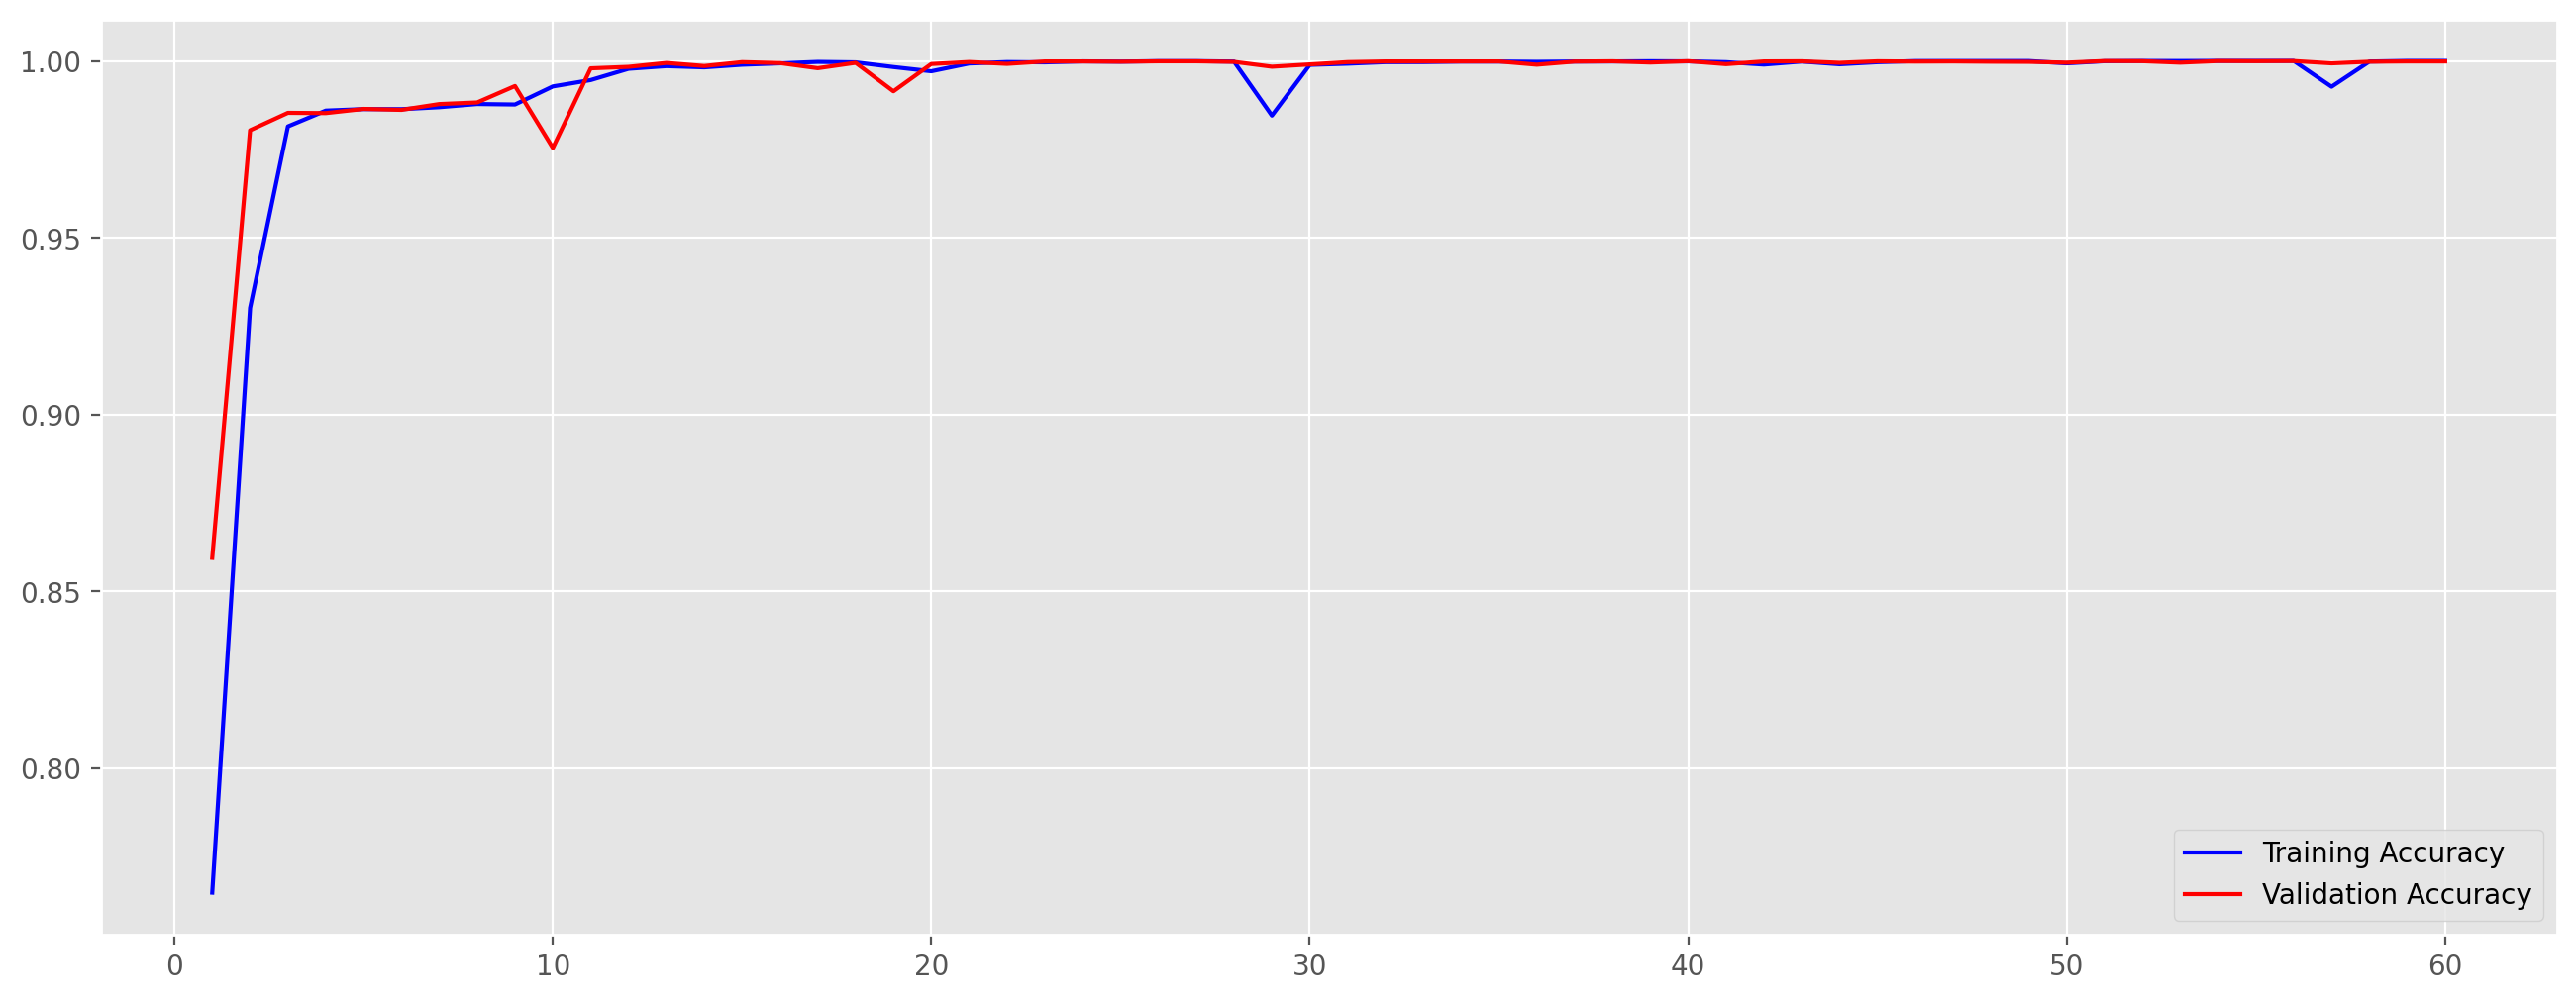

In [36]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

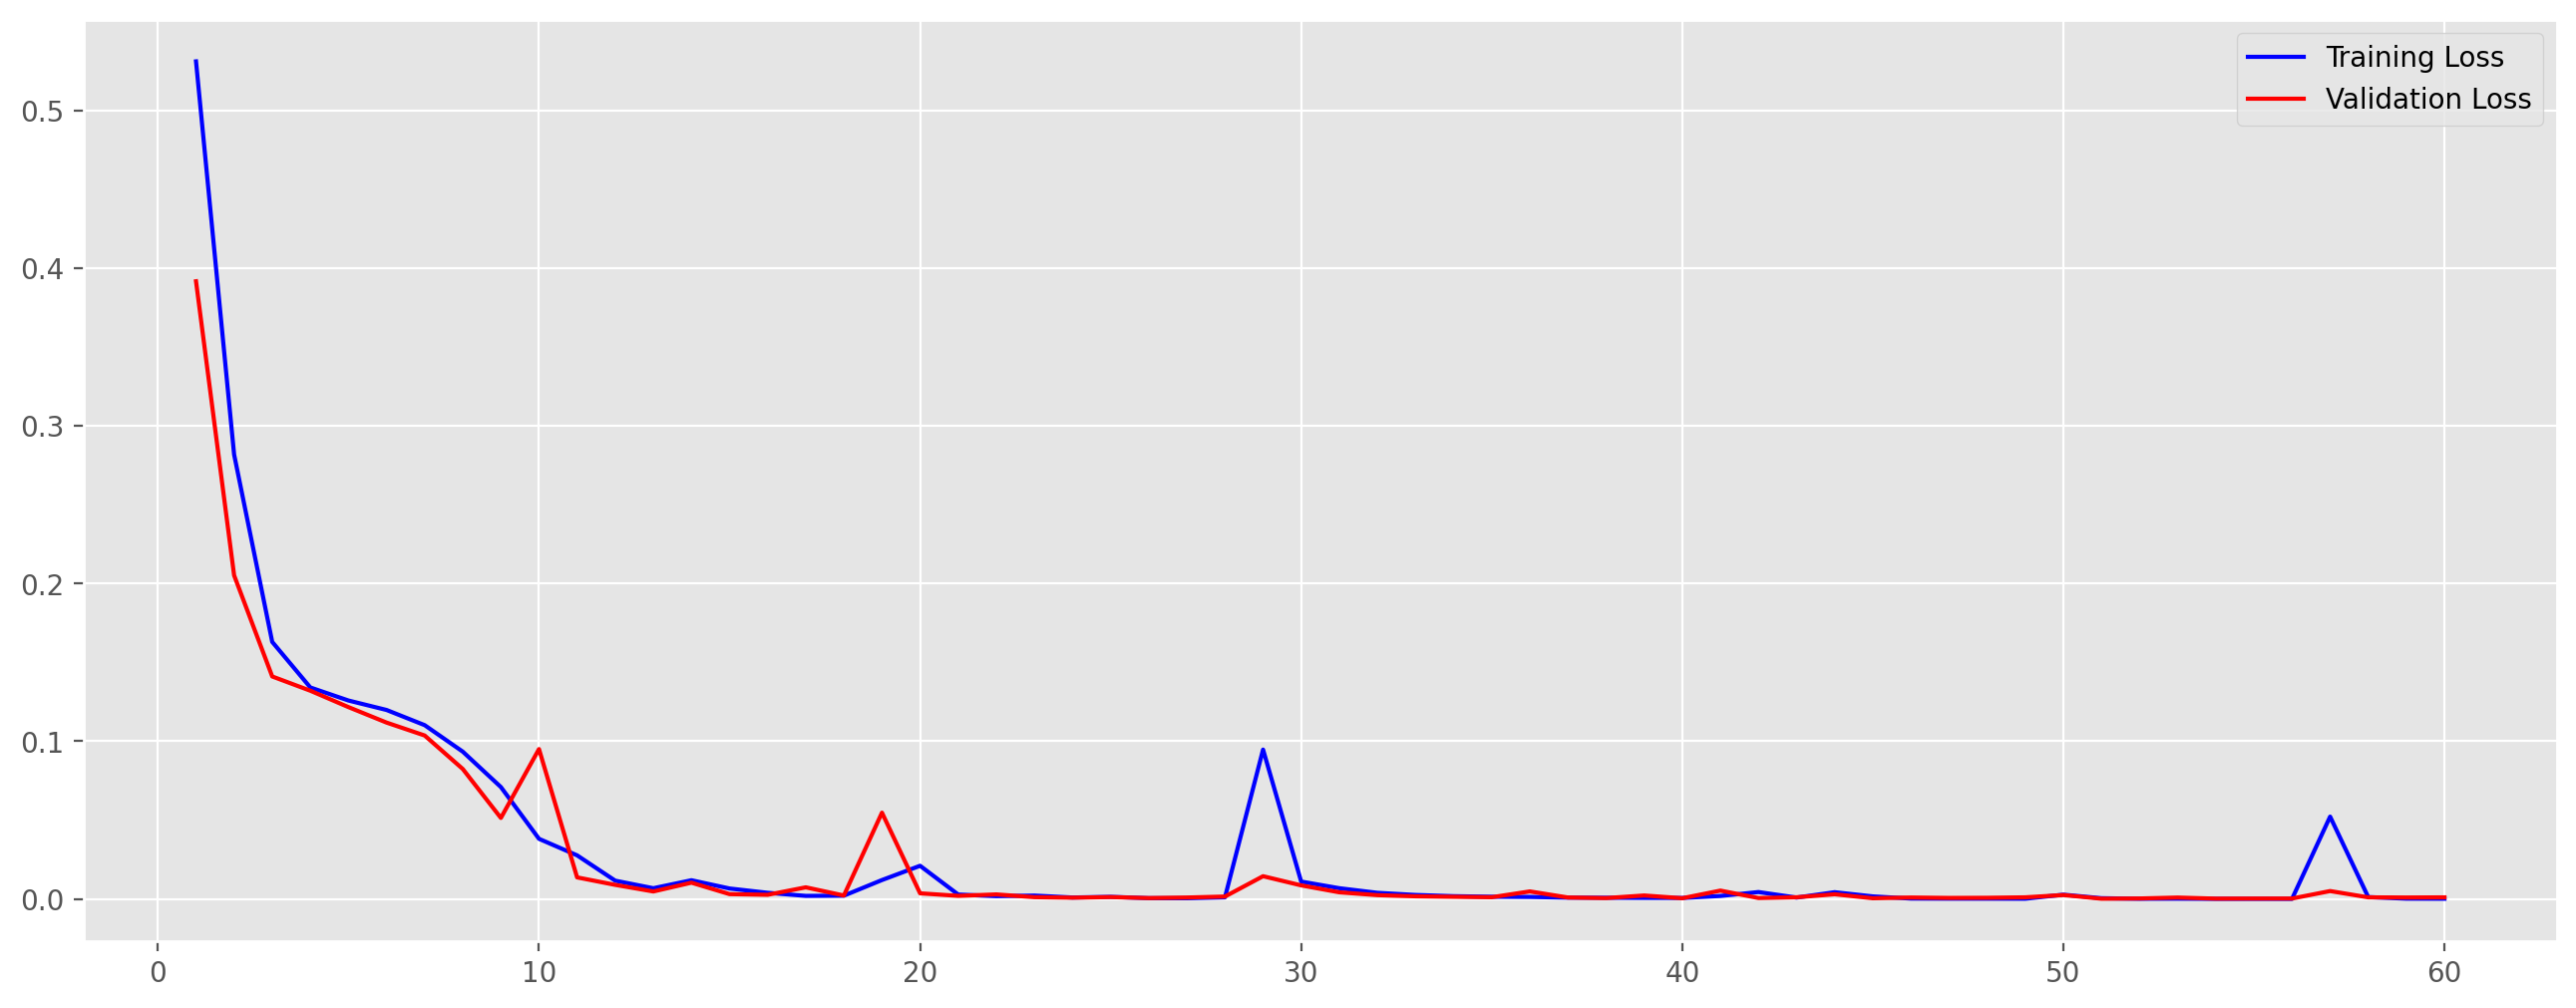

In [37]:
loss_train = history.history['loss']
loss_val   = history.history['val_loss']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

In [38]:
np.argmax(model.predict(x_test[0:1]), axis = 1)

1/1 [==============================] - 0s 193ms/step


array([0])